Multi-Class Random Forest Classifier Method


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_excel('/content/Consumer.xlsx')

df.head()


,Unnamed: 0,Gender,Age,Ever_Married,Members,Profession,Graduated,Work_Experience,Energy_Consumption,Preferred_Renewable,Group
0,0,Male,22,No,4,Healthcare,No,1,Low,Hydro,D
1,2,Female,67,Yes,1,Engineer,Yes,1,Low,Solar,B
2,3,Male,67,Yes,2,Lawyer,Yes,0,High,Solar,B
3,5,Male,56,Yes,2,Artist,No,0,Average,Solar,C
4,6,Male,32,No,3,Healthcare,Yes,1,Low,Solar,C


In [ ]:
df.loc[df['Gender'] == 'Male' , 'Gender',] = 0
df.loc[df['Gender'] == 'Female' , 'Gender',] = 1
df.loc[df['Ever_Married'] == 'No' , 'Ever_Married',] = 0
df.loc[df['Ever_Married'] == 'Yes' , 'Ever_Married',] = 1
df.loc[df['Graduated'] == 'No' , 'Graduated',] = 0
df.loc[df['Graduated'] == 'Yes' , 'Graduated',] = 1
df.loc[df['Energy_Consumption'] == 'Low' , 'Energy_Consumption',] = 0
df.loc[df['Energy_Consumption'] == 'Average' , 'Energy_Consumption',] = 1
df.loc[df['Energy_Consumption'] == 'High' , 'Energy_Consumption',] = 2
df.loc[df['Preferred_Renewable'] == 'Not Interested' , 'Preferred_Renewable',] = 0
df.loc[df['Preferred_Renewable'] == 'Biomass' , 'Preferred_Renewable',] = 1
df.loc[df['Preferred_Renewable'] == 'Geothermal' , 'Preferred_Renewable',] = 2
df.loc[df['Preferred_Renewable'] == 'Hydro' , 'Preferred_Renewable',] = 3
df.loc[df['Preferred_Renewable'] == 'Solar' , 'Preferred_Renewable',] = 4
df.loc[df['Preferred_Renewable'] == 'Tidal' , 'Preferred_Renewable',] = 5
df.loc[df['Preferred_Renewable'] == 'Wind' , 'Preferred_Renewable',] = 6
df.loc[df['Group'] == 'A', 'Group'] = 0
df.loc[df['Group'] == 'B', 'Group'] = 1
df.loc[df['Group'] == 'C', 'Group'] = 2
df.loc[df['Group'] == 'D', 'Group'] = 3
df.loc[df['Profession'] == 'Artist', 'Profession'] = 0
df.loc[df['Profession'] == 'Doctor', 'Profession'] = 1
df.loc[df['Profession'] == 'Engineer', 'Profession'] = 2
df.loc[df['Profession'] == 'Entertainment', 'Profession'] = 3
df.loc[df['Profession'] == 'Executive', 'Profession'] = 4
df.loc[df['Profession'] == 'Healthcare', 'Profession'] = 5
df.loc[df['Profession'] == 'Lawyer', 'Profession'] = 6
df.loc[df['Profession'] == 'Marketing', 'Profession'] = 7
df.loc[df['Profession'] == 'Homemaker', 'Profession'] = 8



In [ ]:

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(y_train)
print(y_test)


2714    1
594     0
2438    1
567     3
592     3
       ..
6017    1
709     3
2487    0
174     0
1146    2
Name: Group, Length: 5332, dtype: object
2066    2
3204    1
1926    1
3481    2
3024    1
       ..
5162    0
4073    1
2927    1
6351    3
6620    0
Name: Group, Length: 1333, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


y_train = le.fit_transform(y_train)


y_test = le.transform(y_test)

In [ ]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4)


rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=4)

In [ ]:

y_pred = rf_classifier.predict(X_test)
print (y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


print('Classification Report:')
print(classification_report(y_test, y_pred))


print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


[0 2 3 ... 2 0 2]
Accuracy: 0.5033758439609902
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.46      0.47       342
           1       0.38      0.36      0.37       334
           2       0.52      0.53      0.52       323
           3       0.62      0.67      0.64       334

    accuracy                           0.50      1333
   macro avg       0.50      0.50      0.50      1333
weighted avg       0.50      0.50      0.50      1333

Confusion Matrix:
[[157  88  38  59]
 [ 68 120 106  40]
 [ 38  77 171  37]
 [ 70  27  14 223]]


This method has a precision of 50% for 100 trees when the trees are increased the accuracy might increase and might be the best method.



k-Nearest Neighbors Method

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel('/content/Consumer.xlsx')

In [ ]:
df.shape

(6665, 11)

In [ ]:
df.head()

,Unnamed: 0,Gender,Age,Ever_Married,Members,Profession,Graduated,Work_Experience,Energy_Consumption,Preferred_Renewable,Group
0,0,Male,22,No,4,Healthcare,No,1,Low,Hydro,D
1,2,Female,67,Yes,1,Engineer,Yes,1,Low,Solar,B
2,3,Male,67,Yes,2,Lawyer,Yes,0,High,Solar,B
3,5,Male,56,Yes,2,Artist,No,0,Average,Solar,C
4,6,Male,32,No,3,Healthcare,Yes,1,Low,Solar,C


In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           6665 non-null   int64 
 1   Gender               6665 non-null   object
 2   Age                  6665 non-null   int64 
 3   Ever_Married         6665 non-null   object
 4   Members              6665 non-null   int64 
 5   Profession           6665 non-null   object
 6   Graduated            6665 non-null   object
 7   Work_Experience      6665 non-null   int64 
 8   Energy_Consumption   6665 non-null   object
 9   Preferred_Renewable  6665 non-null   object
 10  Group                6665 non-null   object
dtypes: int64(4), object(7)
memory usage: 572.9+ KB


In [ ]:
df.loc[df['Gender'] == 'Male' , 'Gender',] = 0
df.loc[df['Gender'] == 'Female' , 'Gender',] = 1
df.loc[df['Ever_Married'] == 'No' , 'Ever_Married',] = 0
df.loc[df['Ever_Married'] == 'Yes' , 'Ever_Married',] = 1
df.loc[df['Graduated'] == 'No' , 'Graduated',] = 0
df.loc[df['Graduated'] == 'Yes' , 'Graduated',] = 1
df.loc[df['Energy_Consumption'] == 'Low' , 'Energy_Consumption',] = 0
df.loc[df['Energy_Consumption'] == 'Average' , 'Energy_Consumption',] = 1
df.loc[df['Energy_Consumption'] == 'High' , 'Energy_Consumption',] = 2
df.loc[df['Preferred_Renewable'] == 'Not Interested' , 'Preferred_Renewable',] = 0
df.loc[df['Preferred_Renewable'] == 'Biomass' , 'Preferred_Renewable',] = 1
df.loc[df['Preferred_Renewable'] == 'Geothermal' , 'Preferred_Renewable',] = 2
df.loc[df['Preferred_Renewable'] == 'Hydro' , 'Preferred_Renewable',] = 3
df.loc[df['Preferred_Renewable'] == 'Solar' , 'Preferred_Renewable',] = 4
df.loc[df['Preferred_Renewable'] == 'Tidal' , 'Preferred_Renewable',] = 5
df.loc[df['Preferred_Renewable'] == 'Wind' , 'Preferred_Renewable',] = 6
df.loc[df['Group'] == 'A', 'Group'] = 0
df.loc[df['Group'] == 'B', 'Group'] = 1
df.loc[df['Group'] == 'C', 'Group'] = 2
df.loc[df['Group'] == 'D', 'Group'] = 3
df.loc[df['Profession'] == 'Artist', 'Profession'] = 0
df.loc[df['Profession'] == 'Doctor', 'Profession'] = 1
df.loc[df['Profession'] == 'Engineer', 'Profession'] = 2
df.loc[df['Profession'] == 'Entertainment', 'Profession'] = 3
df.loc[df['Profession'] == 'Executive', 'Profession'] = 4
df.loc[df['Profession'] == 'Healthcare', 'Profession'] = 5
df.loc[df['Profession'] == 'Lawyer', 'Profession'] = 6
df.loc[df['Profession'] == 'Marketing', 'Profession'] = 7
df.loc[df['Profession'] == 'Homemaker', 'Profession'] = 8


In [ ]:
df.head()
df.drop(['Profession', 'Unnamed: 0','Gender','Age','Ever_Married','Members','Graduated','Work_Experience'], axis=1, inplace=True)

In [ ]:
X = df
y = df['Group']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Group'] = le.fit_transform(X['Group'])

y = le.transform(y)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Energy_Consumption   6665 non-null   object
 1   Preferred_Renewable  6665 non-null   object
 2   Group                6665 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 156.3+ KB


In [ ]:
cols = X.columns
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])
X.head()

,Energy_Consumption,Preferred_Renewable,Group
0,0.0,0.500000,1.000000
1,0.0,0.666667,0.333333
2,1.0,0.666667,0.333333
3,0.5,0.666667,0.666667
4,0.0,0.666667,0.666667


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[ 6.73611111e-01,  6.36330409e-01,  7.16130604e-01],
       [-2.94209102e-15,  6.37654321e-01,  1.33686067e-01],
       [ 7.03775039e-01,  6.29429892e-01,  2.09039548e-01],
       [-2.94209102e-15,  6.26600284e-01,  9.12280702e-01]])

In [ ]:
kmeans.inertia_

566.066693697732

The inertia is the lowest when only the two main determining columns - Energy_Consumption and Preferred_Renewable are taken for the training and testing data, additional of other columns increase the amount of variability

In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 2312 out of 6665 samples were correctly labeled.


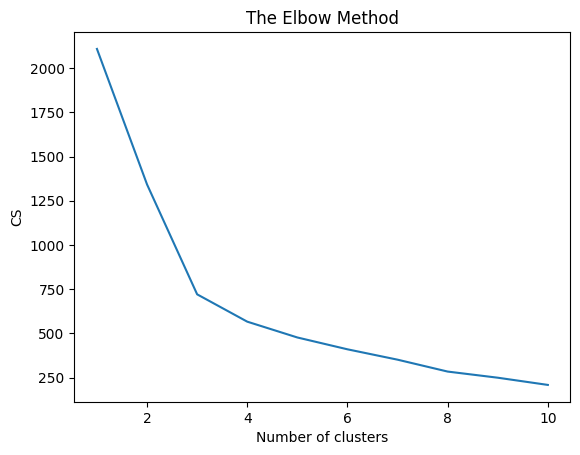

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 45)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Result: 2312 out of 6665 samples were correctly labeled.
Accuracy score: 0.35


This method has the least accuracy dbscan might be better.

Multi-class logistic regression method

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_excel('/content/Consumer.xlsx')
daf = pd.read_excel('/content/Consumers_test.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Consumer.xlsx'

In [ ]:
df


,Unnamed: 0,Gender,Age,Ever_Married,Members,Profession,Graduated,Work_Experience,Energy_Consumption,Preferred_Renewable,Group
0,0,Male,22,No,4,Healthcare,No,1,Low,Hydro,D
1,2,Female,67,Yes,1,Engineer,Yes,1,Low,Solar,B
2,3,Male,67,Yes,2,Lawyer,Yes,0,High,Solar,B
3,5,Male,56,Yes,2,Artist,No,0,Average,Solar,C
4,6,Male,32,No,3,Healthcare,Yes,1,Low,Solar,C
...,...,...,...,...,...,...,...,...,...,...,...
6660,8062,Male,41,Yes,5,Artist,Yes,0,High,Solar,B
6661,8064,Male,35,No,4,Executive,No,3,Low,Hydro,D
6662,8065,Female,33,No,1,Healthcare,Yes,1,Low,Solar,D
6663,8066,Female,27,No,4,Healthcare,Yes,1,Low,Solar,B


In [2]:
df.loc[df['Gender'] == 'Male' , 'Gender',] = 0
df.loc[df['Gender'] == 'Female' , 'Gender',] = 1
df.loc[df['Ever_Married'] == 'No' , 'Ever_Married',] = 0
df.loc[df['Ever_Married'] == 'Yes' , 'Ever_Married',] = 1
df.loc[df['Graduated'] == 'No' , 'Graduated',] = 0
df.loc[df['Graduated'] == 'Yes' , 'Graduated',] = 1
df.loc[df['Energy_Consumption'] == 'Low' , 'Energy_Consumption',] = 0
df.loc[df['Energy_Consumption'] == 'Average' , 'Energy_Consumption',] = 1
df.loc[df['Energy_Consumption'] == 'High' , 'Energy_Consumption',] = 2
df.loc[df['Preferred_Renewable'] == 'Not Interested' , 'Preferred_Renewable',] = 0
df.loc[df['Preferred_Renewable'] == 'Biomass' , 'Preferred_Renewable',] = 1
df.loc[df['Preferred_Renewable'] == 'Geothermal' , 'Preferred_Renewable',] = 2
df.loc[df['Preferred_Renewable'] == 'Hydro' , 'Preferred_Renewable',] = 3
df.loc[df['Preferred_Renewable'] == 'Solar' , 'Preferred_Renewable',] = 4
df.loc[df['Preferred_Renewable'] == 'Tidal' , 'Preferred_Renewable',] = 5
df.loc[df['Preferred_Renewable'] == 'Wind' , 'Preferred_Renewable',] = 6
df.loc[df['Group'] == 'A', 'Group'] = 0
df.loc[df['Group'] == 'B', 'Group'] = 1
df.loc[df['Group'] == 'C', 'Group'] = 2
df.loc[df['Group'] == 'D', 'Group'] = 3
df.loc[df['Profession'] == 'Artist', 'Profession'] = 0
df.loc[df['Profession'] == 'Doctor', 'Profession'] = 1
df.loc[df['Profession'] == 'Engineer', 'Profession'] = 2
df.loc[df['Profession'] == 'Entertainment', 'Profession'] = 3
df.loc[df['Profession'] == 'Executive', 'Profession'] = 4
df.loc[df['Profession'] == 'Healthcare', 'Profession'] = 5
df.loc[df['Profession'] == 'Lawyer', 'Profession'] = 6
df.loc[df['Profession'] == 'Marketing', 'Profession'] = 7
df.loc[df['Profession'] == 'Homemaker', 'Profession'] = 8

NameError: name 'df' is not defined

In [ ]:

df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               6665 non-null   object
 1   Age                  6665 non-null   int64 
 2   Ever_Married         6665 non-null   object
 3   Members              6665 non-null   int64 
 4   Profession           6665 non-null   object
 5   Graduated            6665 non-null   object
 6   Work_Experience      6665 non-null   int64 
 7   Energy_Consumption   6665 non-null   object
 8   Preferred_Renewable  6665 non-null   object
 9   Group                6665 non-null   object
dtypes: int64(3), object(7)
memory usage: 520.8+ KB


In [ ]:
df['Gender'] = df['Gender'].astype(str).astype(int)
df['Ever_Married'] = df['Ever_Married'].astype(str).astype(int)
df['Graduated'] = df['Graduated'].astype(str).astype(int)
df['Profession'] = df['Profession'].astype(str).astype(int)
df['Energy_Consumption'] = df['Energy_Consumption'].astype(str).astype(int)
df['Preferred_Renewable'] = df['Preferred_Renewable'].astype(str).astype(int)
df['Group'] = df['Group'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               6665 non-null   int64
 1   Age                  6665 non-null   int64
 2   Ever_Married         6665 non-null   int64
 3   Members              6665 non-null   int64
 4   Profession           6665 non-null   int64
 5   Graduated            6665 non-null   int64
 6   Work_Experience      6665 non-null   int64
 7   Energy_Consumption   6665 non-null   int64
 8   Preferred_Renewable  6665 non-null   int64
 9   Group                6665 non-null   int64
dtypes: int64(10)
memory usage: 520.8 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df[['Gender','Age','Ever_Married','Members','Profession','Graduated','Work_Experience','Energy_Consumption','Preferred_Renewable']],df['Group'],test_size=0.2,random_state=42)

In [ ]:
len(x_train)

5332

In [ ]:
len(x_test)

1333

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.predict(x_test)

array([3, 0, 3, ..., 2, 2, 2])

In [ ]:
model.score(x_test,y_test)

0.49212303075768943

In [ ]:
df1 = pd.read_excel('/content/Consumers_test.xlsx')

In [ ]:
df1


,Gender,Age,Ever_Married,Members,Profession,Graduated,Work_Experience,Energy_Consumption,Preferred_Renewable
0,1,36,1,1,2,1,0,0,4
1,0,37,1,4,5,1,8,1,4
2,0,59,1,2,4,0,11,2,4
3,0,47,1,5,1,1,0,2,3
4,0,61,1,3,1,1,5,0,4
...,...,...,...,...,...,...,...,...,...
2149,1,35,0,2,3,1,1,0,4
2150,0,29,0,4,5,0,9,0,4
2151,1,35,0,1,1,1,1,0,4
2152,0,47,1,5,4,1,1,2,3


In [ ]:
df1.loc[df1['Gender'] == 'Male' , 'Gender',] = 0
df1.loc[df1['Gender'] == 'Female' , 'Gender',] = 1
df1.loc[df1['Ever_Married'] == 'No' , 'Ever_Married',] = 0
df1.loc[df1['Ever_Married'] == 'Yes' , 'Ever_Married',] = 1
df1.loc[df1['Graduated'] == 'No' , 'Graduated',] = 0
df1.loc[df1['Graduated'] == 'Yes' , 'Graduated',] = 1
df1.loc[df1['Energy_Consumption'] == 'Low' , 'Energy_Consumption',] = 0
df1.loc[df1['Energy_Consumption'] == 'Average' , 'Energy_Consumption',] = 1
df1.loc[df1['Energy_Consumption'] == 'High' , 'Energy_Consumption',] = 2
df1.loc[df1['Preferred_Renewable'] == 'Not Interested' , 'Preferred_Renewable',] = 0
df1.loc[df1['Preferred_Renewable'] == 'Biomass' , 'Preferred_Renewable',] = 1
df1.loc[df1['Preferred_Renewable'] == 'Geothermal' , 'Preferred_Renewable',] = 2
df1.loc[df1['Preferred_Renewable'] == 'Hydro' , 'Preferred_Renewable',] = 3
df1.loc[df1['Preferred_Renewable'] == 'Solar' , 'Preferred_Renewable',] = 4
df1.loc[df1['Preferred_Renewable'] == 'Tidal' , 'Preferred_Renewable',] = 5
df1.loc[df1['Preferred_Renewable'] == 'Wind' , 'Preferred_Renewable',] = 6
df1.loc[df1['Profession'] == 'Artist', 'Profession'] = 0
df1.loc[df1['Profession'] == 'Doctor', 'Profession'] = 1
df1.loc[df1['Profession'] == 'Engineer', 'Profession'] = 2
df1.loc[df1['Profession'] == 'Entertainment', 'Profession'] = 3
df1.loc[df1['Profession'] == 'Executive', 'Profession'] = 4
df1.loc[df1['Profession'] == 'Healthcare', 'Profession'] = 5
df1.loc[df1['Profession'] == 'Lawyer', 'Profession'] = 6
df1.loc[df1['Profession'] == 'Marketing', 'Profession'] = 7
df1.loc[df1['Profession'] == 'Homemaker', 'Profession'] = 8

In [ ]:
df1
df1.info()
df1.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               2154 non-null   int64
 1   Age                  2154 non-null   int64
 2   Ever_Married         2154 non-null   int64
 3   Members              2154 non-null   int64
 4   Profession           2154 non-null   int64
 5   Graduated            2154 non-null   int64
 6   Work_Experience      2154 non-null   int64
 7   Energy_Consumption   2154 non-null   int64
 8   Preferred_Renewable  2154 non-null   int64
dtypes: int64(9)
memory usage: 151.6 KB


,Gender,Age,Ever_Married,Members,Profession,Graduated,Work_Experience,Energy_Consumption,Preferred_Renewable
0,1,36,1,1,2,1,0,0,4
1,0,37,1,4,5,1,8,1,4
2,0,59,1,2,4,0,11,2,4
3,0,47,1,5,1,1,0,2,3
4,0,61,1,3,1,1,5,0,4
...,...,...,...,...,...,...,...,...,...
2149,1,35,0,2,3,1,1,0,4
2150,0,29,0,4,5,0,9,0,4
2151,1,35,0,1,1,1,1,0,4
2152,0,47,1,5,4,1,1,2,3


In [ ]:
df1['Gender'] = df1['Gender'].astype(str).astype(int)
df1['Ever_Married'] = df1['Ever_Married'].astype(str).astype(int)
df1['Graduated'] = df1['Graduated'].astype(str).astype(int)
df1['Profession'] = df1['Profession'].astype(str).astype(int)
df1['Energy_Consumption'] = df1['Energy_Consumption'].astype(str).astype(int)
df1['Preferred_Renewable'] = df1['Preferred_Renewable'].astype(str).astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               2154 non-null   int64
 1   Age                  2154 non-null   int64
 2   Ever_Married         2154 non-null   int64
 3   Members              2154 non-null   int64
 4   Profession           2154 non-null   int64
 5   Graduated            2154 non-null   int64
 6   Work_Experience      2154 non-null   int64
 7   Energy_Consumption   2154 non-null   int64
 8   Preferred_Renewable  2154 non-null   int64
dtypes: int64(9)
memory usage: 151.6 KB


In [ ]:
prediction = model.predict(df1)
print( prediction )

[0 3 1 ... 0 2 3]


In [ ]:
A = "A"
B = "B"
C = "C"
D = "D"
prediction = prediction.tolist()
for i in range (len(prediction)):
  if prediction[i] == 0:
    prediction[i] = A
  elif prediction[i] == 1:
    prediction[i] = B
  elif prediction[i] == 2:
    prediction[i] = C
  else:
    prediction[i] = D

In [ ]:
daf.insert(9, "Group",prediction, True)

In [ ]:
daf


,Unnamed: 0,Gender,Age,Ever_Married,Members,Profession,Graduated,Work_Experience,Energy_Consumption,Group,Preferred_Renewable
0,0,Female,36,Yes,1,Engineer,Yes,0,Low,A,Solar
1,1,Male,37,Yes,4,Healthcare,Yes,8,Average,D,Solar
2,3,Male,59,Yes,2,Executive,No,11,High,B,Solar
3,5,Male,47,Yes,5,Doctor,Yes,0,High,C,Hydro
4,6,Male,61,Yes,3,Doctor,Yes,5,Low,A,Solar
...,...,...,...,...,...,...,...,...,...,...,...
2149,2621,Female,35,No,2,Entertainment,Yes,1,Low,A,Solar
2150,2622,Male,29,No,4,Healthcare,No,9,Low,D,Solar
2151,2623,Female,35,No,1,Doctor,Yes,1,Low,A,Solar
2152,2625,Male,47,Yes,5,Executive,Yes,1,High,C,Hydro


In [ ]:
daf.to_excel('consumer_prediction.xlsx')

The accuracy of this method is similar to that of Random Forest Classifier but One-Vs-One for Multi-Class Classification is easier to apply for logistic regression.